# Análisis comparativo de textos con NLP

In [1]:
# Librerías necesarias
import re
import spacy
import string
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [ ]:
# Cargar modelo spaCy
nlp = spacy.load("es_core_news_md")

# Textos
Los dostextos correspnden a dos fragmentos de ensayos del escritor Estanislao Zuleta. Llamados "Elogio a la dificulad" e "Idealización de la vida personal y colectiva"

In [3]:
# Cargar textos
with open("texto_zuleta.txt", "r", encoding="utf-8") as f:
    text1 = f.read()

with open("texto_fragmento.txt", "r", encoding="utf-8") as f:
    text2 = f.read()

In [4]:
# Normalización
def normalize(text):
    text = re.sub(r"http\S+|www\.\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r"\s+", " ", text)
    return text.strip()

In [5]:
text1_clean = normalize(text1)
text2_clean = normalize(text2)

In [6]:
# Estadísticas básicas sin spaCy
def basic_stats(text):
    paragraphs = text.split("\n")
    sentences = re.split(r'[.!?]', text)
    words = text.split()
    return len(paragraphs), len(sentences), len(words)

In [7]:
stats1 = basic_stats(text1_clean)
stats2 = basic_stats(text2_clean)

print("Texto 1 - Párrafos:", stats1[0], "Frases:", stats1[1], "Palabras:", stats1[2])
print("Texto 2 - Párrafos:", stats2[0], "Frases:", stats2[1], "Palabras:", stats2[2])

Texto 1 - Párrafos: 1 Frases: 1 Palabras: 5526
Texto 2 - Párrafos: 1 Frases: 1 Palabras: 2051


In [8]:
# Procesamiento con spaCy
doc1 = nlp(text1_clean)
doc2 = nlp(text2_clean)

In [9]:
# Lematización y frecuencia
def lemas_frecuentes(doc):
    return Counter([token.lemma_ for token in doc if not token.is_stop and not token.is_punct]).most_common(20)

print("Texto 1 - Lemmas frecuentes:", lemas_frecuentes(doc1))
print("Texto 2 - Lemmas frecuentes:", lemas_frecuentes(doc2))

Texto 1 - Lemmas frecuentes: [('objeto', 20), ('150515', 19), ('943', 19), ('pensamiento', 19), ('idealización', 19), ('imagen', 19), ('Elogiotacozuletaindd', 17), ('vida', 17), ('sentido', 16), ('relación', 15), ('lucha', 13), ('mundo', 11), ('consistir', 11), ('producir', 10), ('desear', 9), ('realidad', 9), ('proceso', 9), ('esencia', 9), ('problema', 8), ('identidad', 8)]
Texto 2 - Lemmas frecuentes: [('autor', 10), ('vida', 7), ('problema', 7), ('desear', 7), ('consecuencia', 6), ('pensamiento', 6), ('amor', 5), ('facilismo', 5), ('crítica', 5), ('Estanislao', 4), ('Zuleta', 4), ('consistir', 4), ('relación', 4), ('capacidad', 4), ('dificultad', 4), ('conclusión', 4), ('argumento', 4), ('método', 4), ('respeto', 4), ('diferencia', 4)]


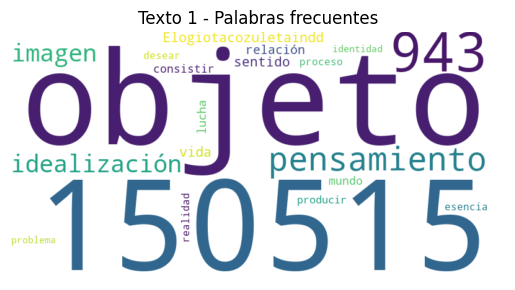

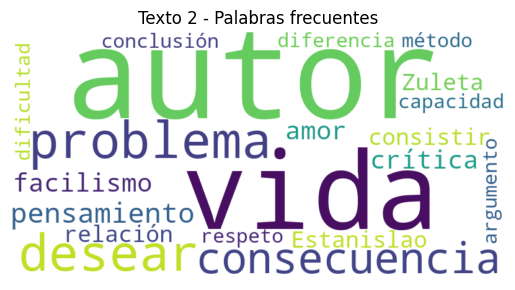

In [10]:
# Nubes de palabras
def plot_wordcloud(freq, title):
    wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(dict(freq))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_wordcloud(lemas_frecuentes(doc1), "Texto 1 - Palabras frecuentes")
plot_wordcloud(lemas_frecuentes(doc2), "Texto 2 - Palabras frecuentes")

In [11]:
# POS tagging
def pos_frecuentes(doc, pos):
    return Counter([token.lemma_ for token in doc if token.pos_ == pos and not token.is_stop]).most_common(15)

for pos, label in [("NOUN", "Sustantivos"), ("VERB", "Verbos"), ("ADJ", "Adjetivos")]:
    print(f"Texto 1 - {label}:", pos_frecuentes(doc1, pos))
    print(f"Texto 2 - {label}:", pos_frecuentes(doc2, pos))

Texto 1 - Sustantivos: [('objeto', 20), ('pensamiento', 19), ('idealización', 19), ('imagen', 19), ('vida', 17), ('sentido', 16), ('relación', 15), ('lucha', 13), ('mundo', 11), ('realidad', 9), ('proceso', 9), ('esencia', 9), ('problema', 8), ('identidad', 8), ('amor', 8)]
Texto 2 - Sustantivos: [('autor', 10), ('vida', 7), ('problema', 7), ('consecuencia', 6), ('pensamiento', 6), ('amor', 5), ('facilismo', 5), ('crítica', 5), ('relación', 4), ('capacidad', 4), ('dificultad', 4), ('conclusión', 4), ('argumento', 4), ('método', 4), ('respeto', 4)]
Texto 1 - Verbos: [('consistir', 11), ('producir', 10), ('desear', 9), ('pensar', 8), ('construir', 6), ('creer', 6), ('valorar', 6), ('encontrar', 5), ('pasar', 5), ('tratar', 5), ('ver', 5), ('permitir', 5), ('captar', 5), ('luchar', 4), ('caer', 4)]
Texto 2 - Verbos: [('desear', 7), ('consistir', 4), ('proponer', 3), ('luchar', 3), ('requerir', 3), ('creer', 3), ('producir', 3), ('aplicar', 3), ('poseer', 2), ('existir', 2), ('permitir', 2

In [12]:
# Extracción SVO
def extract_svo(doc):
    svos = []
    for token in doc:
        if token.dep_ == "ROOT":
            subj = [w.text for w in token.lefts if "subj" in w.dep_]
            obj = [w.text for w in token.rights if "obj" in w.dep_]
            if subj and obj:
                svos.append((subj[0], token.lemma_, obj[0]))
    return svos

print("Texto 1 - SVO:", extract_svo(doc1)[:10])
print("Texto 2 - SVO:", extract_svo(doc2)[:10])

Texto 1 - SVO: [('ELOGIO', 'SOCIOLOGÍA', 'PR'), ('gerente', 'fundado', 'estado')]
Texto 2 - SVO: []
